In [179]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import requests
print("Successful.")

Successful.


In [180]:
results_df = pd.read_csv('results.csv',low_memory=False)
picks_df = pd.read_csv('picks.csv',low_memory=False)
economy_df = pd.read_csv('economy.csv',low_memory=False)
players_df = pd.read_csv('players.csv',low_memory=False)

print("Data cached.")

Data cached.


In [181]:
# Filter by team. Lets get only data that includes Navi's stats.
#team_1, #team_2. If one of these teams are Natus Vincere, keep it. 
target = "Natus Vincere"
results_df = results_df[(results_df.team_1 == target) | (results_df.team_2 == target)]
results_df.head()
print("Successful.")

Successful.


In [182]:
# Filter by team. Lets get only data that includes Navi's stats.
#team_1, #team_2. If one of these teams are Natus Vincere, keep it. 
target = "Natus Vincere"
picks_df = picks_df[(picks_df.team_1 == target) | (picks_df.team_2 == target)]
picks_df.head()
print("Successful.")

Successful.


In [183]:
target = "Natus Vincere"
players_df = players_df[(players_df.team == target) | (players_df.opponent == target)]
players_df.head()
#Note. This particular dataset has many missing values. Possibly due to some tournament matches only being played for less than three maps
print("Successful.")

Successful.


In [184]:
economy_df = economy_df[(economy_df.team_1 == target) | (economy_df.team_2 == target)]
economy_df.head()
print("Successful.")

Successful.


In [185]:
#Get columns from all datasets
results_columns = list(results_df.columns)
economy_columns = list(economy_df.columns)
players_columns = list(players_df.columns)
picks_columns = list(picks_df.columns)
print(picks_columns)
print(players_columns)
print(results_columns)
print(economy_columns)
print("Successful.")

['date', 'team_1', 'team_2', 'inverted_teams', 'match_id', 'event_id', 'best_of', 'system', 't1_removed_1', 't1_removed_2', 't1_removed_3', 't2_removed_1', 't2_removed_2', 't2_removed_3', 't1_picked_1', 't2_picked_1', 'left_over']
['date', 'player_name', 'team', 'opponent', 'country', 'player_id', 'match_id', 'event_id', 'event_name', 'best_of', 'map_1', 'map_2', 'map_3', 'kills', 'assists', 'deaths', 'hs', 'flash_assists', 'kast', 'kddiff', 'adr', 'fkdiff', 'rating', 'm1_kills', 'm1_assists', 'm1_deaths', 'm1_hs', 'm1_flash_assists', 'm1_kast', 'm1_kddiff', 'm1_adr', 'm1_fkdiff', 'm1_rating', 'm2_kills', 'm2_assists', 'm2_deaths', 'm2_hs', 'm2_flash_assists', 'm2_kast', 'm2_kddiff', 'm2_adr', 'm2_fkdiff', 'm2_rating', 'm3_kills', 'm3_assists', 'm3_deaths', 'm3_hs', 'm3_flash_assists', 'm3_kast', 'm3_kddiff', 'm3_adr', 'm3_fkdiff', 'm3_rating', 'kills_ct', 'deaths_ct', 'kddiff_ct', 'adr_ct', 'kast_ct', 'rating_ct', 'kills_t', 'deaths_t', 'kddiff_t', 'adr_t', 'kast_t', 'rating_t', 'm1_k

In [186]:
all_columns = []
for i in results_columns:
    all_columns.append(i)
for j in economy_columns:
    all_columns.append(j)
for k in players_columns:
    all_columns.append(k)
for l in picks_columns:
    all_columns.append(l)
print(all_columns)
print("Successful.")

['date', 'team_1', 'team_2', '_map', 'result_1', 'result_2', 'map_winner', 'starting_ct', 'ct_1', 't_2', 't_1', 'ct_2', 'event_id', 'match_id', 'rank_1', 'rank_2', 'map_wins_1', 'map_wins_2', 'match_winner', 'date', 'match_id', 'event_id', 'team_1', 'team_2', 'best_of', '_map', 't1_start', 't2_start', '1_t1', '2_t1', '3_t1', '4_t1', '5_t1', '6_t1', '7_t1', '8_t1', '9_t1', '10_t1', '11_t1', '12_t1', '13_t1', '14_t1', '15_t1', '16_t1', '17_t1', '18_t1', '19_t1', '20_t1', '21_t1', '22_t1', '23_t1', '24_t1', '25_t1', '26_t1', '27_t1', '28_t1', '29_t1', '30_t1', '1_t2', '2_t2', '3_t2', '4_t2', '5_t2', '6_t2', '7_t2', '8_t2', '9_t2', '10_t2', '11_t2', '12_t2', '13_t2', '14_t2', '15_t2', '16_t2', '17_t2', '18_t2', '19_t2', '20_t2', '21_t2', '22_t2', '23_t2', '24_t2', '25_t2', '26_t2', '27_t2', '28_t2', '29_t2', '30_t2', '1_winner', '2_winner', '3_winner', '4_winner', '5_winner', '6_winner', '7_winner', '8_winner', '9_winner', '10_winner', '11_winner', '12_winner', '13_winner', '14_winner', '1

In [187]:
results_df.to_csv('natus_vincere_results.csv', index=False)
economy_df.to_csv('natus_vincere_economy.csv', index=False)
players_df.to_csv('natus_vincere_players.csv', index=False)
picks_df.to_csv('natus_vincere_picks.csv', index=False)
#Get the preprocessed data and put them into seperate CSV files.

In [188]:
# List of columns names was found. Now find a collection of all the data 
data_pool = []
with open('natus_vincere_results.csv', "r") as f:
    for line in f.read().split("\n"):
        if line == "":
            continue
        data_pool.append(line)
with open('natus_vincere_economy.csv', "r") as g:
    for line in g.read().split("\n"):
        if line == "":
            continue
        data_pool.append(line)
with open('natus_vincere_players.csv', "r") as h:
    for line in h.read().split("\n"):
        if line == "":
            continue
        data_pool.append(line)
with open('natus_vincere_picks.csv', "r") as i:
    for line in i.read().split("\n"):
        if line == "":
            continue
        data_pool.append(line)


In [189]:
data_pool

['date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner',
 '3/17/2020,Natus Vincere,North,Nuke,10,16,2,1,7,8,3,8,5226,2340396,1,23,0,2,2',
 '3/17/2020,Natus Vincere,North,Dust2,10,16,2,1,5,10,5,6,5226,2340396,1,23,0,2,2',
 '3/1/2020,G2,Natus Vincere,Mirage,2,16,2,2,1,2,1,14,4901,2339402,8,6,0,3,2',
 '3/1/2020,G2,Natus Vincere,Nuke,4,16,2,2,3,2,1,14,4901,2339402,8,6,0,3,2',
 '3/1/2020,G2,Natus Vincere,Dust2,13,16,2,1,7,8,6,8,4901,2339402,8,6,0,3,2',
 '2/29/2020,Natus Vincere,Astralis,Nuke,16,5,1,1,13,2,3,3,4901,2339401,6,1,2,0,1',
 '2/29/2020,Natus Vincere,Astralis,Dust2,16,5,1,2,2,4,14,1,4901,2339401,6,1,2,0,1',
 '2/28/2020,Natus Vincere,Liquid,Dust2,16,11,1,2,6,6,10,5,4901,2339399,6,3,2,0,1',
 '2/28/2020,Natus Vincere,Liquid,Mirage,16,13,1,1,9,6,7,7,4901,2339399,6,3,2,0,1',
 '2/27/2020,Natus Vincere,FaZe,Inferno,16,14,1,1,9,6,7,8,4901,2339397,6,9,2,1,1',
 '2/27/2020,Natus Vincere,FaZe,Nuke,

In [190]:
df1 = pd.read_csv('natus_vincere_results.csv')
df2 = pd.read_csv('natus_vincere_economy.csv')
print("done")

done


In [191]:
df_merged = pd.merge(df1, df2, on = 'match_id', how='inner')
#merge economy and results together based on rows sharing the same match id (meaning, this is the corresponding game being played)

In [192]:
df_merged

date_x           team_1_x               team_2_x       _map_x  \
0       3/1/2020                 G2          Natus Vincere       Mirage   
1       3/1/2020                 G2          Natus Vincere       Mirage   
2       3/1/2020                 G2          Natus Vincere       Mirage   
3       3/1/2020                 G2          Natus Vincere         Nuke   
4       3/1/2020                 G2          Natus Vincere         Nuke   
5       3/1/2020                 G2          Natus Vincere         Nuke   
6       3/1/2020                 G2          Natus Vincere        Dust2   
7       3/1/2020                 G2          Natus Vincere        Dust2   
8       3/1/2020                 G2          Natus Vincere        Dust2   
9      2/29/2020      Natus Vincere               Astralis         Nuke   
10     2/29/2020      Natus Vincere               Astralis         Nuke   
11     2/29/2020      Natus Vincere               Astralis        Dust2   
12     2/29/2020      Natus Vincere               Astralis        Dust2   
13     2/28/2020      Natus Vincere                 Liquid        Dust2   
14     2/28/2020      Natus Vincere                 Liquid        Dust2   
15     2/28/2020      Natus Vincere                 Liquid       Mirage   
16     2/28/2020      Natus Vincere                 Liquid       Mirage   
17     2/27/2020      Natus Vincere                   FaZe      Inferno   
18     2/27/2020      Natus Vincere                   FaZe      Inferno   
19     2/27/2020      Natus Vincere                   FaZe      Inferno   
20     2/27/2020      Natus Vincere                   FaZe         Nuke   
21     2/27/2020      Natus Vincere                   FaZe         Nuke   
22     2/27/2020      Natus Vincere                   FaZe         Nuke   
23     2/27/2020      Natus Vincere                   FaZe        Dust2   
24     2/27/2020      Natus Vincere                   FaZe        Dust2   
25     2/27/2020      Natus Vincere                   FaZe        Dust2   
26     2/26/2020                NiP          Natus Vincere        Train   
27     2/26/2020                NiP          Natus Vincere        Train   
28     2/26/2020                NiP          Natus Vincere       Mirage   
29     2/26/2020                NiP          Natus Vincere       Mirage   
30     2/25/2020      Natus Vincere                 fnatic        Dust2   
31     2/25/2020      Natus Vincere                 fnatic        Dust2   
32     2/25/2020      Natus Vincere                 fnatic        Dust2   
33     2/25/2020      Natus Vincere                 fnatic      Inferno   
34     2/25/2020      Natus Vincere                 fnatic      Inferno   
35     2/25/2020      Natus Vincere                 fnatic      Inferno   
36     2/25/2020      Natus Vincere                 fnatic       Mirage   
37     2/25/2020      Natus Vincere                 fnatic       Mirage   
38     2/25/2020      Natus Vincere                 fnatic       Mirage   
39     2/24/2020      Natus Vincere                   FaZe        Dust2   
40     2/24/2020      Natus Vincere                   FaZe        Dust2   
41     2/24/2020      Natus Vincere                   FaZe        Dust2   
42     2/24/2020      Natus Vincere                   FaZe     Overpass   
43     2/24/2020      Natus Vincere                   FaZe     Overpass   
44     2/24/2020      Natus Vincere                   FaZe     Overpass   
45     2/24/2020      Natus Vincere                   FaZe         Nuke   
46     2/24/2020      Natus Vincere                   FaZe         Nuke   
47     2/24/2020      Natus Vincere                   FaZe         Nuke   
48      2/9/2020         Complexity          Natus Vincere       Mirage   
49      2/9/2020         Complexity          Natus Vincere       Mirage   
50      2/9/2020         Complexity          Natus Vincere        Train   
51      2/9/2020         Complexity          Natus Vincere        Train   
52      2/9/2020      Natus Vincere

In [193]:
df_merged.to_csv("results_economy_combo.csv", index=False)
#note, I will have to redo my columns and data arrays. Thats fine

In [194]:
df3 = pd.read_csv('natus_vincere_players.csv')
df4 = pd.read_csv('natus_vincere_picks.csv')
print("read successful")

read successful


In [195]:
df_merged_two = pd.merge(df_merged, df3, on = 'match_id', how = 'inner')

In [196]:
df_merged_two.to_csv("results_economy_players_combo.csv", index = False)

df_merged_three = pd.merge(df_merged_two, df4, on = 'match_id', how = 'inner')
print('done')

In [197]:
df_merged_three = pd.merge(df_merged_two, df4, on = 'match_id', how = 'inner') 
print('done')

done


C:\Users\elect\AppData\Local\Temp\ipykernel_23152\1548990134.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'date_x', 'event_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_merged_three = pd.merge(df_merged_two, df4, on = 'match_id', how = 'inner')


In [198]:
#use this to analyze how player performance correlates with results in a seperate ml model iteration
df_merged_results_players = pd.merge(df3, df1, on = 'match_id', how = 'inner')

In [199]:
#include all rows from our CSVs where Natus Vincere is not team 2. For simplicity of processing this data.
#Meaning, the data we evaluate will always have Navi as team_1
df_merged_results_players.to_csv("results_players_combo.csv", index = False)
df_results_players = pd.read_csv("results_players_combo.csv")
df_results_players.drop_duplicates()
df_results_players = df_results_players.loc[:,~df_results_players.columns.duplicated()].copy()
df_results_players = df_results_players.drop(df_results_players.filter(regex='_y').columns, axis=1)
df_results_players = df_results_players[df_results_players.team_2 != "Natus Vincere"]
df_results_players.to_csv("results_players_combo.csv", index = False)
print("Results players combo file has been updated")

Results players combo file has been updated


In [200]:
#Do the same with economy_results and complete_stat_sheet
df_economy_results = pd.read_csv("results_economy_combo.csv")
df_economy_results.drop_duplicates()
df_economy_results = df_economy_results.loc[:,~df_economy_results.columns.duplicated()].copy()
df_economy_results = df_economy_results.drop(df_economy_results.filter(regex='_y').columns, axis=1)
df_economy_results = df_economy_results[df_economy_results.team_2_x != "Natus Vincere"]
df_economy_results.to_csv("results_economy_combo.csv", index = False)
print("Economy results combo have been updated")

Economy results combo have been updated


In [201]:
#Do the same with complete_stat_sheet
df_merged_three.drop_duplicates()

df_merged_three = df_merged_three.loc[:,~df_merged_three.columns.duplicated()].copy()

#df_merged_three.drop(['date_y', 'event_id_y', 'player_name_y', 'team_y', 'opponent_y', 'country_x', 'country_y'], axis = 1   )
#if the above drop gives mixed results, revert it.
#remove duplicates and duplicate columns  (if they are named the same)
df_merged_three = df_merged_three.drop(df_merged_three.filter(regex='_y').columns, axis=1)
df_merged_three = df_merged_three[df_merged_three.team_2 != "Natus Vincere"]
df_merged_three.to_csv("complete_stat_sheet.csv", index = False)

print("Complete stat sheet has been updated")

Complete stat sheet has been updated


In [202]:
#We have a complete stat sheet. Ready to move on
test = pd.read_csv("results_players_combo.csv")

In [203]:
test

date_x player_name           team       opponent  country  \
0     2020-02-25     Boombl4  Natus Vincere         fnatic   Russia   
1     2020-02-25     Boombl4  Natus Vincere         fnatic   Russia   
2     2020-02-25     Boombl4  Natus Vincere         fnatic   Russia   
3     2020-02-25     Brollan         fnatic  Natus Vincere   Sweden   
4     2020-02-25     Brollan         fnatic  Natus Vincere   Sweden   
...          ...         ...            ...            ...      ...   
4742  2015-11-06       gob b    mousesports  Natus Vincere  Germany   
4743  2015-11-06         nex    mousesports  Natus Vincere  Germany   
4744  2015-11-06         nex    mousesports  Natus Vincere  Germany   
4745  2015-11-06      seized  Natus Vincere    mousesports   Russia   
4746  2015-11-06      seized  Natus Vincere    mousesports   Russia   

      player_id  match_id  event_id_x                         event_name  \
0         11840   2339383        4901                  IEM Katowice 2020   
1         11840   2339383        4901                  IEM Katowice 2020   
2         11840   2339383        4901                  IEM Katowice 2020   
3         13666   2339383        4901                  IEM Katowice 2020   
4         13666   2339383        4901                  IEM Katowice 2020   
...         ...       ...         ...                                ...   
4742        136   2299078        1853  CEVO Professional Season 8 Finals   
4743       7256   2299078        1853  CEVO Professional Season 8 Finals   
4744       7256   2299078        1853  CEVO Professional Season 8 Finals   
4745       3347   2299078        1853  CEVO Professional Season 8 Finals   
4746       3347   2299078        1853  CEVO Professional Season 8 Finals   

      best_of  ... starting_ct ct_1 t_2  t_1  ct_2  rank_1  rank_2  \
0           3  ...           2    2   6    5    10       6       4   
1           3  ...           1    7   8    9     6       6       4   
2           3  ...           1   10   5    2    11       6       4   
3           3  ...           2    2   6    5    10       6       4   
4           3  ...           1    7   8    9     6       6       4   
...       ...  ...         ...  ...  ..  ...   ...     ...     ...   
4742        3  ...           1    9   6    1    10       5      13   
4743        3  ...           1    4  11    3     5       5      13   
4744        3  ...           1    9   6    1    10       5      13   
4745        3  ...           1    4  11    3     5       5      13   
4746        3  ...           1    9   6    1    10       5      13   

      map_wins_1  map_wins_2  match_winner  
0              1           2             2  
1              1           2             2  
2              1           2             2  
3              1           2             2  
4              1           2             2  
...          ...         ...           ...  
4742           0           2             2  
4743           0           2             2  
4744           0           2             2  
4745           0           2             2  
4746           0           2             2  

[4747 rows x 117 columns]

In [206]:
#Match Winner (match_winner) is the variable we will look for to check if Navi/Natus Vincere wins.
#First lets move match_winner_name and match_winner to the end of all three sheets
#column_to_move1 = df.pop('match_winner_team')
#column_to_move2 = df_economy_results.pop('match_winner_team')

df.insert(len(df.columns)-1, 'match_winner_team', column_to_move1)
#df_economy_results.insert(len(df_economy_results.columns)-1, 'match_winner_team', column_to_move2)

column_to_move3 = df.pop('match_winner')
column_to_move4 = df_economy_results.pop('match_winner')

df.insert(len(df.columns)-2, 'match_winner', column_to_move3)
df_economy_results.insert(len(df_economy_results.columns)-2, 'match_winner', column_to_move4)

#column_to_move5 = df_results_players.pop('match_winner_team')
column_to_move6 = df_results_players.pop('match_winner')
#df_results_players.insert(len(df_results_players.columns)-1, 'match_winner_team', column_to_move5)
df_results_players.insert(len(df_results_players.columns)-2, 'match_winner', column_to_move6)
print("successfully shifted over match winner and winning team columns")

successfully shifted over match winner and winning team columns


In [207]:
df_results_players.head(100)

date_x  player_name           team       opponent  \
20   2020-02-25      Boombl4  Natus Vincere         fnatic   
21   2020-02-25      Boombl4  Natus Vincere         fnatic   
22   2020-02-25      Boombl4  Natus Vincere         fnatic   
23   2020-02-25      Brollan         fnatic  Natus Vincere   
24   2020-02-25      Brollan         fnatic  Natus Vincere   
25   2020-02-25      Brollan         fnatic  Natus Vincere   
26   2020-02-25       Golden         fnatic  Natus Vincere   
27   2020-02-25       Golden         fnatic  Natus Vincere   
28   2020-02-25       Golden         fnatic  Natus Vincere   
29   2020-02-25           JW         fnatic  Natus Vincere   
30   2020-02-25           JW         fnatic  Natus Vincere   
31   2020-02-25           JW         fnatic  Natus Vincere   
32   2020-02-25        KRIMZ         fnatic  Natus Vincere   
33   2020-02-25        KRIMZ         fnatic  Natus Vincere   
34   2020-02-25        KRIMZ         fnatic  Natus Vincere   
35   2020-02-25     Perfecto  Natus Vincere         fnatic   
36   2020-02-25     Perfecto  Natus Vincere         fnatic   
37   2020-02-25     Perfecto  Natus Vincere         fnatic   
38   2020-02-25   electronic  Natus Vincere         fnatic   
39   2020-02-25   electronic  Natus Vincere         fnatic   
40   2020-02-25   electronic  Natus Vincere         fnatic   
41   2020-02-25       flamie  Natus Vincere         fnatic   
42   2020-02-25       flamie  Natus Vincere         fnatic   
43   2020-02-25       flamie  Natus Vincere         fnatic   
44   2020-02-25       flusha         fnatic  Natus Vincere   
45   2020-02-25       flusha         fnatic  Natus Vincere   
46   2020-02-25       flusha         fnatic  Natus Vincere   
47   2020-02-25       s1mple  Natus Vincere         fnatic   
48   2020-02-25       s1mple  Natus Vincere         fnatic   
49   2020-02-25       s1mple  Natus Vincere         fnatic   
50   2020-02-24      Boombl4  Natus Vincere           FaZe   
51   2020-02-24      Boombl4  Natus Vincere           FaZe   
52   2020-02-24      Boombl4  Natus Vincere           FaZe   
53   2020-02-24         NiKo           FaZe  Natus Vincere   
54   2020-02-24         NiKo           FaZe  Natus Vincere   
55   2020-02-24         NiKo           FaZe  Natus Vincere   
56   2020-02-24     Perfecto  Natus Vincere           FaZe   
57   2020-02-24     Perfecto  Natus Vincere           FaZe   
58   2020-02-24     Perfecto  Natus Vincere           FaZe   
59   2020-02-24        broky           FaZe  Natus Vincere   
60   2020-02-24        broky           FaZe  Natus Vincere   
61   2020-02-24        broky           FaZe  Natus Vincere   
62   2020-02-24     coldzera           FaZe  Natus Vincere   
63   2020-02-24     coldzera           FaZe  Natus Vincere   
64   2020-02-24     coldzera           FaZe  Natus Vincere   
65   2020-02-24   electronic  Natus Vincere           FaZe   
66   2020-02-24   electronic  Natus Vincere           FaZe   
67   2020-02-24   electronic  Natus Vincere           FaZe   
68   2020-02-24       flamie  Natus Vincere           FaZe   
69   2020-02-24       flamie  Natus Vincere           FaZe   
70   2020-02-24       flamie  Natus Vincere           FaZe   
71   2020-02-24  olofmeister           FaZe  Natus Vincere   
72   2020-02-24  olofmeister           FaZe  Natus Vincere   
73   2020-02-24  olofmeister           FaZe  Natus Vincere   
74   2020-02-24         rain           FaZe  Natus Vincere   
75   2020-02-24         rain           FaZe  Natus Vincere   
76   2020-02-24         rain           FaZe  Natus Vincere   
77   2020-02-24       s1mple  Natus Vincere           FaZe   
78   2020-02-24       s1mple  Natus Vincere           FaZe   
79   2020-02-24       s1mple  Natus Vincere           FaZe   
100  2020-02-09         ALEX       Vitality  Natus Vincere   
101  2020-02-09         ALEX       Vitality  Natus Vincere   
102  2020-02-09      Boombl4  Natus Vincere       Vitality   
103  2020-02-09      Boombl4  Natus Vince

In [212]:
#Lets take df_results_players and make a new column, match_winner_team. Then rewrite to csv
df_results_players['match_winner_name'] = np.where(df_results_players['match_winner'] == 1, 'Natus Vincere', df_results_players['team_2'])
df_results_players.head(100)
df_results_players.to_csv('results_players_combo.csv', index = False)
print('Results players has been edited')

Results players has been edited


In [213]:
df = pd.read_csv("complete_stat_sheet.csv")
#complete_columns = []
#limited_columns = []
results_players_columns = []
#complete_columns = list(df.columns)
#limited_columns = list(df_economy_results.columns)
results_players_columns = list(df_results_players.columns)
#print(complete_columns)
#print(limited_columns)
print(results_players_columns)

['date_x', 'player_name', 'team', 'opponent', 'country', 'player_id', 'match_id', 'event_id_x', 'event_name', 'best_of', 'map_1', 'map_2', 'map_3', 'kills', 'assists', 'deaths', 'hs', 'flash_assists', 'kast', 'kddiff', 'adr', 'fkdiff', 'rating', 'm1_kills', 'm1_assists', 'm1_deaths', 'm1_hs', 'm1_flash_assists', 'm1_kast', 'm1_kddiff', 'm1_adr', 'm1_fkdiff', 'm1_rating', 'm2_kills', 'm2_assists', 'm2_deaths', 'm2_hs', 'm2_flash_assists', 'm2_kast', 'm2_kddiff', 'm2_adr', 'm2_fkdiff', 'm2_rating', 'm3_kills', 'm3_assists', 'm3_deaths', 'm3_hs', 'm3_flash_assists', 'm3_kast', 'm3_kddiff', 'm3_adr', 'm3_fkdiff', 'm3_rating', 'kills_ct', 'deaths_ct', 'kddiff_ct', 'adr_ct', 'kast_ct', 'rating_ct', 'kills_t', 'deaths_t', 'kddiff_t', 'adr_t', 'kast_t', 'rating_t', 'm1_kills_ct', 'm1_deaths_ct', 'm1_kddiff_ct', 'm1_adr_ct', 'm1_kast_ct', 'm1_rating_ct', 'm1_kills_t', 'm1_deaths_t', 'm1_kddiff_t', 'm1_adr_t', 'm1_kast_t', 'm1_rating_t', 'm2_kills_ct', 'm2_deaths_ct', 'm2_kddiff_ct', 'm2_adr_ct'

In [165]:
#Updated CSV files to include the names of the winner teams instead of just their number.
#df

date_x        team_1_x               team_2_x       _map_x  \
0      2/25/2020   Natus Vincere                 fnatic        Dust2   
1      2/25/2020   Natus Vincere                 fnatic        Dust2   
2      2/25/2020   Natus Vincere                 fnatic        Dust2   
3      2/25/2020   Natus Vincere                 fnatic        Dust2   
4      2/25/2020   Natus Vincere                 fnatic        Dust2   
5      2/25/2020   Natus Vincere                 fnatic        Dust2   
6      2/25/2020   Natus Vincere                 fnatic        Dust2   
7      2/25/2020   Natus Vincere                 fnatic        Dust2   
8      2/25/2020   Natus Vincere                 fnatic        Dust2   
9      2/25/2020   Natus Vincere                 fnatic        Dust2   
10     2/25/2020   Natus Vincere                 fnatic        Dust2   
11     2/25/2020   Natus Vincere                 fnatic        Dust2   
12     2/25/2020   Natus Vincere                 fnatic        Dust2   
13     2/25/2020   Natus Vincere                 fnatic        Dust2   
14     2/25/2020   Natus Vincere                 fnatic        Dust2   
15     2/25/2020   Natus Vincere                 fnatic        Dust2   
16     2/25/2020   Natus Vincere                 fnatic        Dust2   
17     2/25/2020   Natus Vincere                 fnatic        Dust2   
18     2/25/2020   Natus Vincere                 fnatic        Dust2   
19     2/25/2020   Natus Vincere                 fnatic        Dust2   
20     2/25/2020   Natus Vincere                 fnatic        Dust2   
21     2/25/2020   Natus Vincere                 fnatic        Dust2   
22     2/25/2020   Natus Vincere                 fnatic        Dust2   
23     2/25/2020   Natus Vincere                 fnatic        Dust2   
24     2/25/2020   Natus Vincere                 fnatic        Dust2   
25     2/25/2020   Natus Vincere                 fnatic        Dust2   
26     2/25/2020   Natus Vincere                 fnatic        Dust2   
27     2/25/2020   Natus Vincere                 fnatic        Dust2   
28     2/25/2020   Natus Vincere                 fnatic        Dust2   
29     2/25/2020   Natus Vincere                 fnatic        Dust2   
30     2/25/2020   Natus Vincere                 fnatic      Inferno   
31     2/25/2020   Natus Vincere                 fnatic      Inferno   
32     2/25/2020   Natus Vincere                 fnatic      Inferno   
33     2/25/2020   Natus Vincere                 fnatic      Inferno   
34     2/25/2020   Natus Vincere                 fnatic      Inferno   
35     2/25/2020   Natus Vincere                 fnatic      Inferno   
36     2/25/2020   Natus Vincere                 fnatic      Inferno   
37     2/25/2020   Natus Vincere                 fnatic      Inferno   
38     2/25/2020   Natus Vincere                 fnatic      Inferno   
39     2/25/2020   Natus Vincere                 fnatic      Inferno   
40     2/25/2020   Natus Vincere                 fnatic      Inferno   
41     2/25/2020   Natus Vincere                 fnatic      Inferno   
42     2/25/2020   Natus Vincere                 fnatic      Inferno   
43     2/25/2020   Natus Vincere                 fnatic      Inferno   
44     2/25/2020   Natus Vincere                 fnatic      Inferno   
45     2/25/2020   Natus Vincere                 fnatic      Inferno   
46     2/25/2020   Natus Vincere                 fnatic      Inferno   
47     2/25/2020   Natus Vincere                 fnatic      Inferno   
48     2/25/2020   Natus Vincere                 fnatic      Inferno   
49     2/25/2020   Natus Vincere                 fnatic      Inferno   
50     2/25/2020   Natus Vincere                 fnatic      Inferno   
51     2/25/2020   Natus Vincere                 fnatic      Inferno   
52     2/25/2020   Natus Vincere                 fnatic      Inferno   
53     2/25/2020   Natus Vincere                 fnatic      Inferno   
54     2/25/2020   Natus Vincere                 f

In [143]:
#df_economy_results.head(74)

date_x     team_1_x       team_2_x  _map_x  result_1  result_2  \
0   3/1/2020           G2  Natus Vincere  Mirage         2        16   
1   3/1/2020           G2  Natus Vincere  Mirage         2        16   
2   3/1/2020           G2  Natus Vincere  Mirage         2        16   
3   3/1/2020           G2  Natus Vincere    Nuke         4        16   
4   3/1/2020           G2  Natus Vincere    Nuke         4        16   
..       ...          ...            ...     ...       ...       ...   
69  2/6/2020  mousesports  Natus Vincere   Dust2        16        14   
70  2/6/2020  mousesports  Natus Vincere   Dust2        16        14   
71  2/6/2020  mousesports  Natus Vincere   Dust2        16        14   
72  2/6/2020  mousesports  Natus Vincere    Nuke        16         9   
73  2/6/2020  mousesports  Natus Vincere    Nuke        16         9   

    map_winner  starting_ct  ct_1  t_2  ...  24_winner  25_winner  26_winner  \
0            2            2     1    2  ...        NaN        NaN        NaN   
1            2            2     1    2  ...        1.0        1.0        1.0   
2            2            2     1    2  ...        NaN        NaN        NaN   
3            2            2     3    2  ...        NaN        NaN        NaN   
4            2            2     3    2  ...        1.0        1.0        1.0   
..         ...          ...   ...  ...  ...        ...        ...        ...   
69           1            1     5   10  ...        2.0        1.0        1.0   
70           1            1     5   10  ...        1.0        NaN        NaN   
71           1            1     5   10  ...        1.0        1.0        2.0   
72           1            1    10    5  ...        2.0        1.0        1.0   
73           1            1    10    5  ...        1.0        NaN        NaN   

    27_winner  28_winner  29_winner  match_winner  match_winner_team  \
0         NaN        NaN        NaN             2      Natus Vincere   
1         2.0        2.0        2.0             2      Natus Vincere   
2         NaN        NaN        NaN             2      Natus Vincere   
3         NaN        NaN        NaN             2      Natus Vincere   
4         2.0        2.0        2.0             2      Natus Vincere   
..        ...        ...        ...           ...                ...   
69        1.0        2.0        1.0             1        mousesports   
70        NaN        NaN        NaN             1        mousesports   
71        2.0        NaN        NaN             1        mousesports   
72        1.0        2.0        1.0             1        mousesports   
73        NaN        NaN        NaN             1        mousesports   

    30_winner navi_win  
0         NaN       18  
1         NaN       18  
2         NaN       18  
3         NaN       18  
4         NaN       18  
..        ...      ...  
69        1.0       28  
70        NaN       28  
71        NaN       28  
72        1.0       28  
73        NaN       28  

[74 rows x 114 columns]

In [215]:
#create a win statistic/column/category for navi in both sheets
df_results_players['navi_win'] = df_results_players.match_winner_name.astype("category").cat.codes
print("Successful.")

Successful.


In [217]:
df_results_players.head(200)


date_x  player_name           team       opponent  \
20   2020-02-25      Boombl4  Natus Vincere         fnatic   
21   2020-02-25      Boombl4  Natus Vincere         fnatic   
22   2020-02-25      Boombl4  Natus Vincere         fnatic   
23   2020-02-25      Brollan         fnatic  Natus Vincere   
24   2020-02-25      Brollan         fnatic  Natus Vincere   
25   2020-02-25      Brollan         fnatic  Natus Vincere   
26   2020-02-25       Golden         fnatic  Natus Vincere   
27   2020-02-25       Golden         fnatic  Natus Vincere   
28   2020-02-25       Golden         fnatic  Natus Vincere   
29   2020-02-25           JW         fnatic  Natus Vincere   
30   2020-02-25           JW         fnatic  Natus Vincere   
31   2020-02-25           JW         fnatic  Natus Vincere   
32   2020-02-25        KRIMZ         fnatic  Natus Vincere   
33   2020-02-25        KRIMZ         fnatic  Natus Vincere   
34   2020-02-25        KRIMZ         fnatic  Natus Vincere   
35   2020-02-25     Perfecto  Natus Vincere         fnatic   
36   2020-02-25     Perfecto  Natus Vincere         fnatic   
37   2020-02-25     Perfecto  Natus Vincere         fnatic   
38   2020-02-25   electronic  Natus Vincere         fnatic   
39   2020-02-25   electronic  Natus Vincere         fnatic   
40   2020-02-25   electronic  Natus Vincere         fnatic   
41   2020-02-25       flamie  Natus Vincere         fnatic   
42   2020-02-25       flamie  Natus Vincere         fnatic   
43   2020-02-25       flamie  Natus Vincere         fnatic   
44   2020-02-25       flusha         fnatic  Natus Vincere   
45   2020-02-25       flusha         fnatic  Natus Vincere   
46   2020-02-25       flusha         fnatic  Natus Vincere   
47   2020-02-25       s1mple  Natus Vincere         fnatic   
48   2020-02-25       s1mple  Natus Vincere         fnatic   
49   2020-02-25       s1mple  Natus Vincere         fnatic   
50   2020-02-24      Boombl4  Natus Vincere           FaZe   
51   2020-02-24      Boombl4  Natus Vincere           FaZe   
52   2020-02-24      Boombl4  Natus Vincere           FaZe   
53   2020-02-24         NiKo           FaZe  Natus Vincere   
54   2020-02-24         NiKo           FaZe  Natus Vincere   
55   2020-02-24         NiKo           FaZe  Natus Vincere   
56   2020-02-24     Perfecto  Natus Vincere           FaZe   
57   2020-02-24     Perfecto  Natus Vincere           FaZe   
58   2020-02-24     Perfecto  Natus Vincere           FaZe   
59   2020-02-24        broky           FaZe  Natus Vincere   
60   2020-02-24        broky           FaZe  Natus Vincere   
61   2020-02-24        broky           FaZe  Natus Vincere   
62   2020-02-24     coldzera           FaZe  Natus Vincere   
63   2020-02-24     coldzera           FaZe  Natus Vincere   
64   2020-02-24     coldzera           FaZe  Natus Vincere   
65   2020-02-24   electronic  Natus Vincere           FaZe   
66   2020-02-24   electronic  Natus Vincere           FaZe   
67   2020-02-24   electronic  Natus Vincere           FaZe   
68   2020-02-24       flamie  Natus Vincere           FaZe   
69   2020-02-24       flamie  Natus Vincere           FaZe   
70   2020-02-24       flamie  Natus Vincere           FaZe   
71   2020-02-24  olofmeister           FaZe  Natus Vincere   
72   2020-02-24  olofmeister           FaZe  Natus Vincere   
73   2020-02-24  olofmeister           FaZe  Natus Vincere   
74   2020-02-24         rain           FaZe  Natus Vincere   
75   2020-02-24         rain           FaZe  Natus Vincere   
76   2020-02-24         rain           FaZe  Natus Vincere   
77   2020-02-24       s1mple  Natus Vincere           FaZe   
78   2020-02-24       s1mple  Natus Vincere           FaZe   
79   2020-02-24       s1mple  Natus Vincere           FaZe   
100  2020-02-09         ALEX       Vitality  Natus Vincere   
101  2020-02-09         ALEX       Vitality  Natus Vincere   
102  2020-02-09      Boombl4  Natus Vincere       Vitality   
103  2020-02-09      Boombl4  Natus Vince

In [91]:
#26 if Navi won. If navi_win is not 26, Natus Vincere did not win that tournament match. 
#Which numeric features, (or more, if desired), in the chart correlate most with Natus Vincere winning a game?
#Ie, which numeric features correlate most with navi_win being 26? AKA, Navi winning? What correlates with navi_win not being 26?
#Aka, Navi losing?
#Note: This only applies to using the dataset of results_players_combo. Other datasets may provide different numbers.
#But for the sake of this project, use results_players_combo.csv



In [241]:
#I will try to find the top 40 most "interesting" features. Basically, 40 factors with the most significant correlation to Navi winning
#Find the correlation, and perform preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
complete_correlations = df_results_players[results_players_columns+['navi_win']].corr(numeric_only = True)
#complete_correlations = complete_correlations.drop('match_winner', axis=1)
complete_correlations.drop('match_winner', axis=0, inplace=True)
complete_correlations.drop('match_winner', axis=1, inplace=True)
#Drop match winner from the process of finding variables most important to Navi winning the match
#complete_correlations
#print(complete_correlations)
#limited_correlations = df_economy_results[limited_columns+['navi_win']].corr(numeric_only = True)
print(((complete_correlations["navi_win"].apply(abs)).sort_values(ascending = False)).iloc[:100])
#.sort_values())
#.sort_values(by = correlations, ascending=False).iloc[:25])


navi_win            1.000000
map_winner          0.270658
result_2            0.213262
ct_2                0.176175
result_1            0.137239
m3_deaths_t         0.136958
m3_deaths           0.113107
t_2                 0.105818
m3_flash_assists    0.102363
m3_kills_ct         0.100633
t_1                 0.098300
rank_1              0.091972
map_wins_1          0.088432
flash_assists       0.083077
ct_1                0.077518
m3_kills            0.074599
m2_flash_assists    0.072430
m1_flash_assists    0.071534
m1_deaths           0.066110
rank_2              0.065738
deaths              0.059411
m3_kast_ct          0.057852
m2_assists          0.056689
m3_kddiff_ct        0.056231
m3_kddiff_t         0.054724
kills               0.054481
m3_adr_ct           0.053803
hs                  0.051516
event_id_x          0.050109
m2_kast_t           0.048378
m1_kills            0.048296
m3_deaths_ct        0.047182
m1_hs               0.046534
m3_rating_ct        0.044225
m2_deaths_ct  

In [220]:
#Remember, Navi is Team 1 in all scenarios. So for example, t_1 represents Team 1's (Navi's) performance on the T (Terrorist) side in-game
#t_1 therefore represents how significant, positively, Navi's performance is on the T side to winning their overall match.
#Oppositely, t_2 represents Team 2's (whichever team it may be) performance on the T side. Which positively impacts the chances of Navi losing.
#And again, if navi_win = 26, they won. If not, they lost

In [247]:
#We have many features. Lets limit, I dont want to added a lot of noise to the model
important_features = []
for c in results_players_columns+['navi_win']:
    try:
        if abs(complete_correlations[c]['navi_win']) > 0.065:
            important_features.append(c)
    except KeyError:
            pass
selected_data = df_results_players[important_features]

In [271]:
selected_data.head(100)
selected_data = selected_data.fillna(selected_data.mean(), inplace=False)

<Axes: >

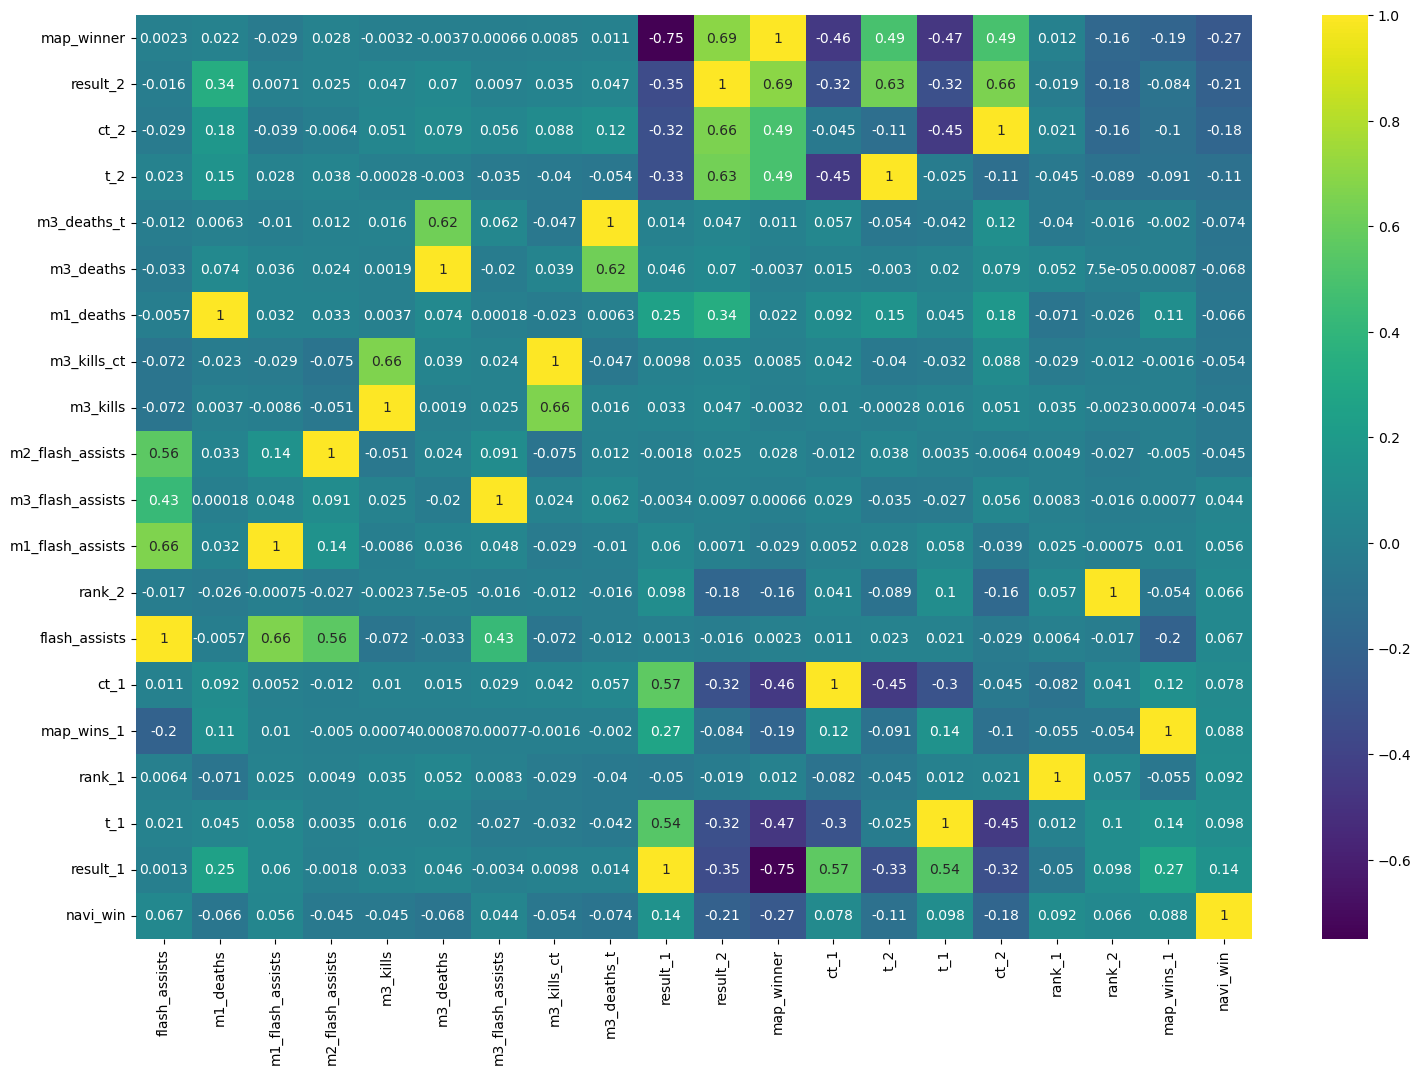

In [272]:
#Great, lets visualize our correlation chart now that we have a good dataframe 
plt.figure(figsize = (18,12))
sns.heatmap(selected_data.corr().sort_values(by = 'navi_win'), annot = True, cmap = 'viridis')

In [273]:
#As we se there is a high correlation between Navi winning (navi_win) and variables such as t_1 (their performance on the T side), ct_1 (their performance on the CT side), etc
#Interestingly, map_winner negatively impacts navi_win. Perhaps comparatively in our dataset, Navi did not win as many maps as other teams did. So their chances of winning are negatively impacted


array([[<Axes: title={'center': 'flash_assists'}>,
        <Axes: title={'center': 'm1_deaths'}>,
        <Axes: title={'center': 'm1_flash_assists'}>,
        <Axes: title={'center': 'm2_flash_assists'}>],
       [<Axes: title={'center': 'm3_kills'}>,
        <Axes: title={'center': 'm3_deaths'}>,
        <Axes: title={'center': 'm3_flash_assists'}>,
        <Axes: title={'center': 'm3_kills_ct'}>],
       [<Axes: title={'center': 'm3_deaths_t'}>,
        <Axes: title={'center': 'result_1'}>,
        <Axes: title={'center': 'result_2'}>,
        <Axes: title={'center': 'map_winner'}>],
       [<Axes: title={'center': 'ct_1'}>,
        <Axes: title={'center': 't_2'}>, <Axes: title={'center': 't_1'}>,
        <Axes: title={'center': 'ct_2'}>],
       [<Axes: title={'center': 'rank_1'}>,
        <Axes: title={'center': 'rank_2'}>,
        <Axes: title={'center': 'map_wins_1'}>,
        <Axes: title={'center': 'navi_win'}>]], dtype=object)

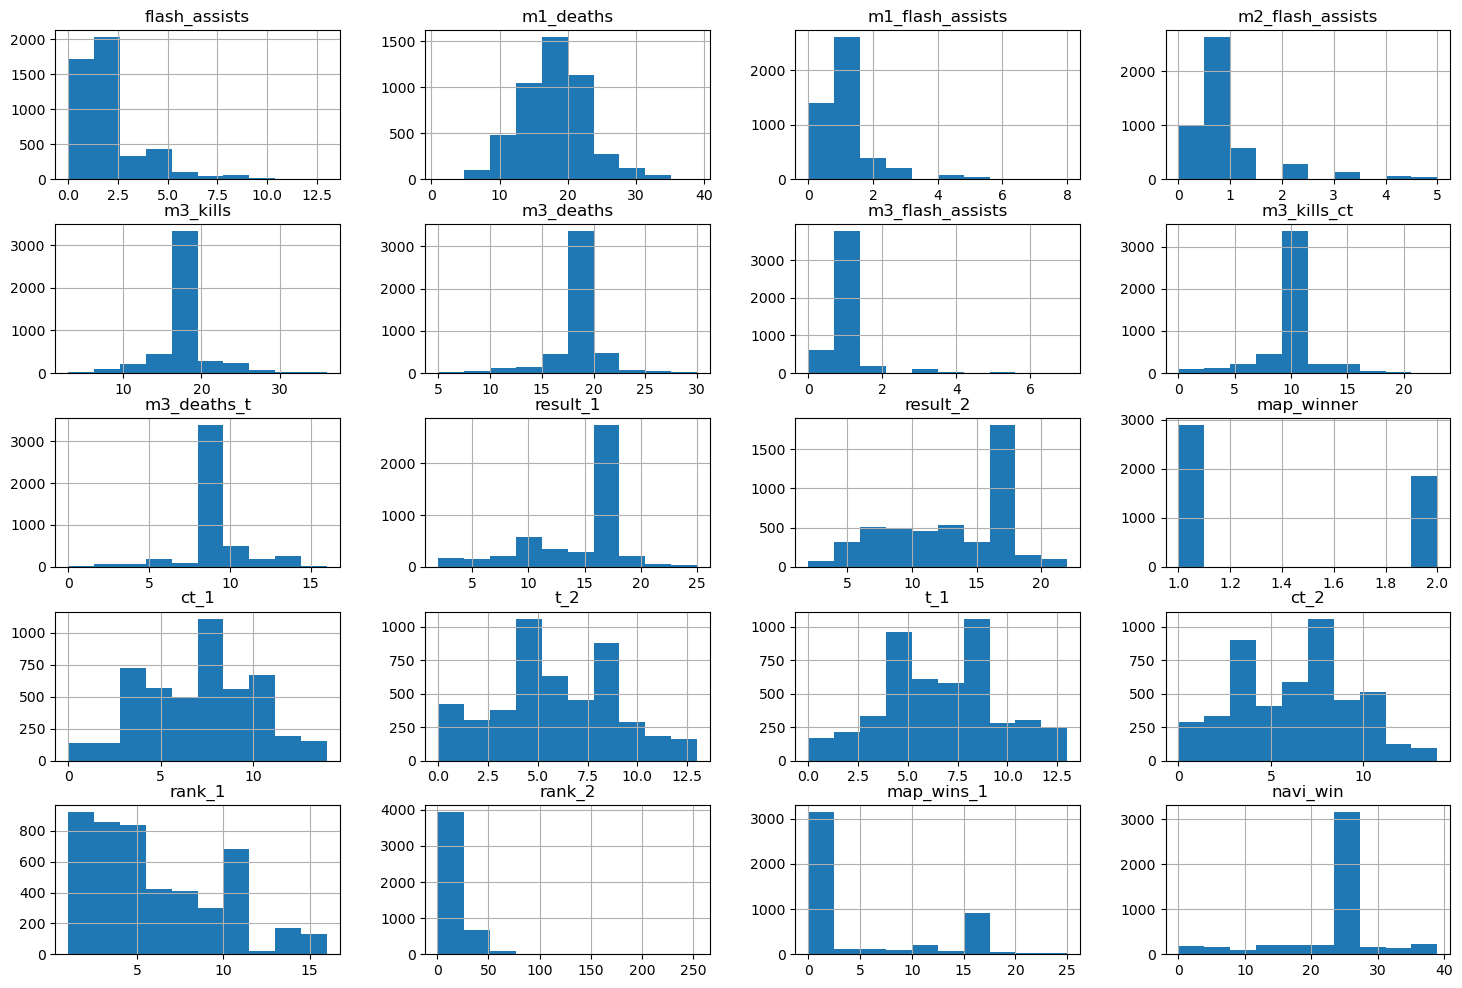

In [274]:
selected_data.hist(figsize=(18,12))

In [275]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 20 to 7866
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flash_assists     4747 non-null   float64
 1   m1_deaths         4747 non-null   int64  
 2   m1_flash_assists  4747 non-null   float64
 3   m2_flash_assists  4747 non-null   float64
 4   m3_kills          4747 non-null   float64
 5   m3_deaths         4747 non-null   float64
 6   m3_flash_assists  4747 non-null   float64
 7   m3_kills_ct       4747 non-null   float64
 8   m3_deaths_t       4747 non-null   float64
 9   result_1          4747 non-null   int64  
 10  result_2          4747 non-null   int64  
 11  map_winner        4747 non-null   int64  
 12  ct_1              4747 non-null   int64  
 13  t_2               4747 non-null   int64  
 14  t_1               4747 non-null   int64  
 15  ct_2              4747 non-null   int64  
 16  rank_1            4747 non-null   int64  

In [276]:
#Lets start training the model
from sklearn.model_selection import train_test_split
#split 
X, y = selected_data.drop(['navi_win'], axis = 1), selected_data['navi_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [277]:
len(X_train)


3797

In [279]:
len(X_test)

950

In [280]:
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)
forests = RandomForestClassifier(n_jobs=4)
forests.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=4)

In [281]:
forests.score(X_test_scaled, y_test)

0.9957894736842106